In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-adview-dataset/train.csv
/kaggle/input/youtube-adview-dataset/test.csv


In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv("../input/youtube-adview-dataset/train.csv")

In [43]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [44]:
df.shape

(14999, 9)

In [45]:
df.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [46]:
category={'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'H': 8,}
df["category"]=df["category"].map(category)
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [47]:
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']

In [48]:
df["views"]=pd.to_numeric(df["views"])
df["comment"]=pd.to_numeric(df["comment"])
df["likes"]=pd.to_numeric(df["likes"])
df["dislikes"]=pd.to_numeric(df["dislikes"])
df["adview"]=pd.to_numeric(df["adview"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  object
 7   duration   14637 non-null  object
 8   category   14637 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [50]:
column_vidid=df['vidid']

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
df['duration']=LabelEncoder().fit_transform(df['duration'])
df['vidid']=LabelEncoder().fit_transform(df['vidid'])
df['published']=LabelEncoder().fit_transform(df['published'])

In [53]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [54]:
import datetime
import time

In [55]:
def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  p= ['H','M','S']
  for i in y:
    if i not in p:
      mm+=i
    else:
      if(i=="H"):
        h=mm
        mm=''
      elif(i=="M"):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
  if(h==''):
    h='00'
  if(m==''):
    m='00'
  if(s==''):
    m='00'
  bp = h+':'+m+':'+s
  return bp
train = pd.read_csv("../input/youtube-adview-dataset/train.csv")
mp=pd.read_csv("../input/youtube-adview-dataset/train.csv")["duration"]
time=mp.apply(checki)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   vidid      14637 non-null  int64
 1   adview     14637 non-null  int64
 2   views      14637 non-null  int64
 3   likes      14637 non-null  int64
 4   dislikes   14637 non-null  int64
 5   comment    14637 non-null  int64
 6   published  14637 non-null  int64
 7   duration   14637 non-null  int64
 8   category   14637 non-null  int64
dtypes: int64(9)
memory usage: 1.1 MB


In [76]:
def func_sec(time_string):
  h , m, s=time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

  time1=time.apply(func_sec)
  df["duration"]=time1
df.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,2925,6
1,1707,56,2,6,2185,3040,4
2,2023,25,0,2,2094,1863,3
3,620860,777,161,153,2119,2546,8
4,666,1,0,0,2091,1963,4


In [109]:
# Split Data
Y_train = pd.DataFrame(data = df.iloc[:, 1].values, columns = ['target'])
df.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y_train, test_size=0.2, random_state=42)

X_train.shape



(11709, 7)

In [201]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train.mean()

0.25583174881891707

In [202]:
# Evaluation Metrics
from sklearn import metrics
from matplotlib import pyplot as plt
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [226]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

#model fitting
prediction1 = linear_regression.predict(X_test)

#evaluation metrics
mael = metrics.mean_absolute_error(y_test, prediction1)
rmsel = np.sqrt(metrics.mean_squared_error(y_test, prediction1))
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 1400.9515488267107
Mean Squared Error: 20110781.475119248
Root Mean Squared Error: 4484.504596398498


In [227]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

#model fitting
prediction2 = decision_tree.predict(X_test)

#evaluation metrics
maed = metrics.mean_absolute_error(y_test, prediction2)
rmsed = np.sqrt(metrics.mean_squared_error(y_test, prediction2))
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 1396.4873633879781
Mean Squared Error: 19249480.43681694
Root Mean Squared Error: 4387.422983576685


4484.504596398498


<BarContainer object of 4 artists>

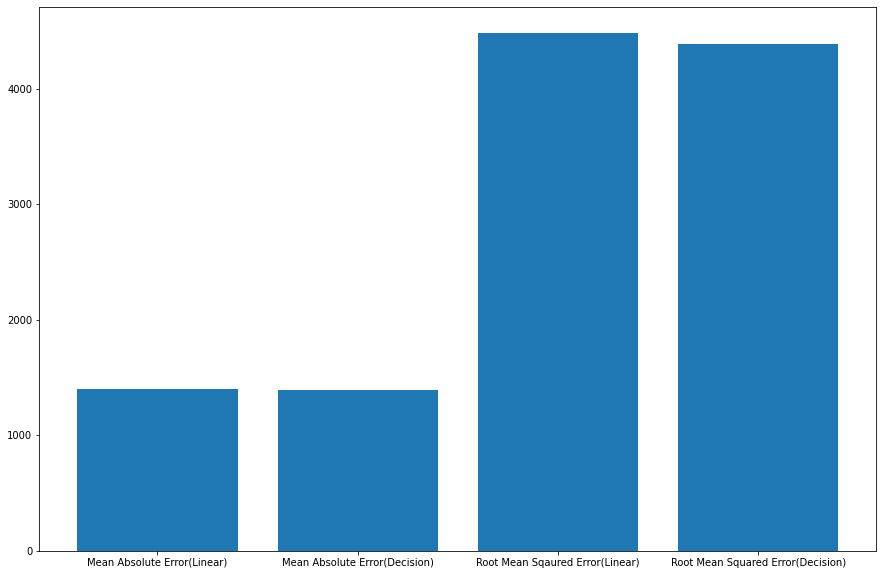

In [232]:
from matplotlib import pyplot as plt
dftemp= pd.DataFrame()
fig = plt.figure(figsize =(15, 10))
dftemp['metric']=["Mean Absolute Error(Linear)","Mean Absolute Error(Decision)","Root Mean Sqaured Error(Linear)","Root Mean Squared Error(Decision)"]
dftemp['values']=[mael,maed,rmsel,rmsed]
print(rmsel)
plt.bar(dftemp['metric'], dftemp['values'])

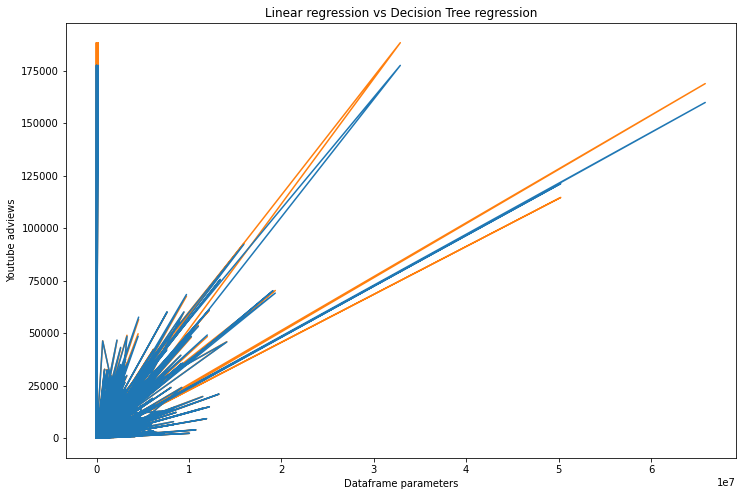

In [196]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (12, 8))
plt.plot(X_test, prediction1, color='tab:orange')
plt.xlabel('Dataframe parameters')
plt.ylabel('Youtube adviews')
plt.title('Linear regression vs Decision Tree regression')
#plt.axis([0, 6, 0, 20]) 
plt.plot(X_test,prediction2, color= 'tab:blue')


In [68]:
#Saving Scikitlearn models
import pickle
pickle.dump(decision_tree, open("decision_tree.pkl","wb"))


In [69]:
dft = pd.read_csv("../input/youtube-adview-dataset/test.csv")

In [70]:
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [234]:
from keras.models import load_model
model = pickle.load(open("decision_tree.pkl","rb"))

In [235]:
# Removing character "F" present in data
dft=dft[dft.views!='F']
dft=dft[dft.likes!='F']
dft=dft[dft.dislikes!='F']
dft=dft[dft.comment!='F']

In [236]:
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [237]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dft["category"]=dft["category"].map(category)
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [238]:
# Convert values to integers for views, likes, comments, dislikes and adview
dft["views"] = pd.to_numeric(dft["views"])
dft["comment"] = pd.to_numeric(dft["comment"])
dft["likes"] = pd.to_numeric(dft["likes"])
dft["dislikes"] = pd.to_numeric(dft["dislikes"])
column_vidid=dft['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
dft['duration']=LabelEncoder().fit_transform(dft['duration'])
dft['vidid']=LabelEncoder().fit_transform(dft['vidid'])
dft['published']=LabelEncoder().fit_transform(dft['published'])
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [239]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("../input/youtube-adview-dataset/test.csv")
mp = pd.read_csv("../input/youtube-adview-dataset/test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

dft["duration"]=time1
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [240]:
dft=dft.drop(["vidid"],axis=1)
dft.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = dft
X_test=scaler.fit_transform(X_test)

In [242]:
prediction = model.predict(X_test)

In [243]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [244]:
prediction = prediction.rename(columns={0: "Adview"})

In [245]:
dft['adview']= prediction

In [246]:
dft.to_csv('predictions.csv')